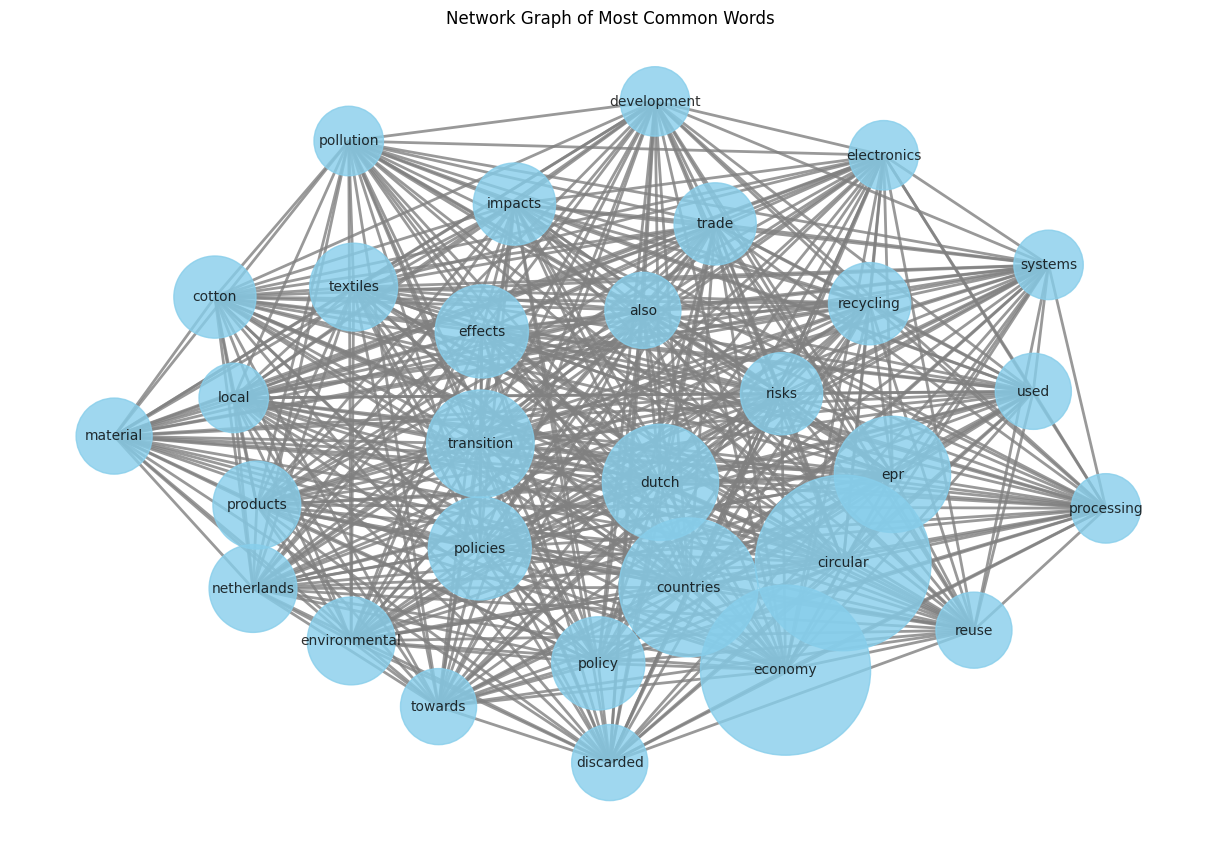

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter


df = pd.read_csv('pbl_data.csv')

# Combine all the content into one string
text = ' '.join(df['content'].dropna())

# Tokenize the text into words
words = word_tokenize(text.lower())

# Filter out stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]

# Get the most common single words (unigrams)
word_counter = Counter(filtered_words)
most_common_words = word_counter.most_common(30)  # Adjust the number of most common words as needed

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for word, count in most_common_words:
    G.add_node(word, count=count)  # Add nodes for each word
    for other_word, other_count in most_common_words:
        if word != other_word:
            G.add_edge(word, other_word, weight=min(count, other_count))  # Add edges between words with weights

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
node_size = [d['count'] * 500 for (n, d) in G.nodes(data=True)]
nx.draw(G, pos, node_color='skyblue', node_size=node_size, with_labels=True, font_size=10, edge_color='gray', width=2, alpha=0.8)
plt.title('Network Graph of Most Common Words')
plt.show()
nx.write_gexf(G,'common_words.gexf')


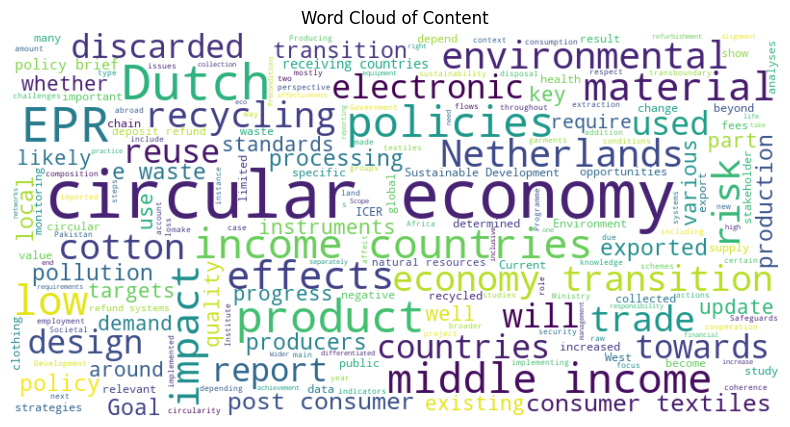

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('pbl_data.csv')

# Combine all the content into one string
text = ' '.join(df['content'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()


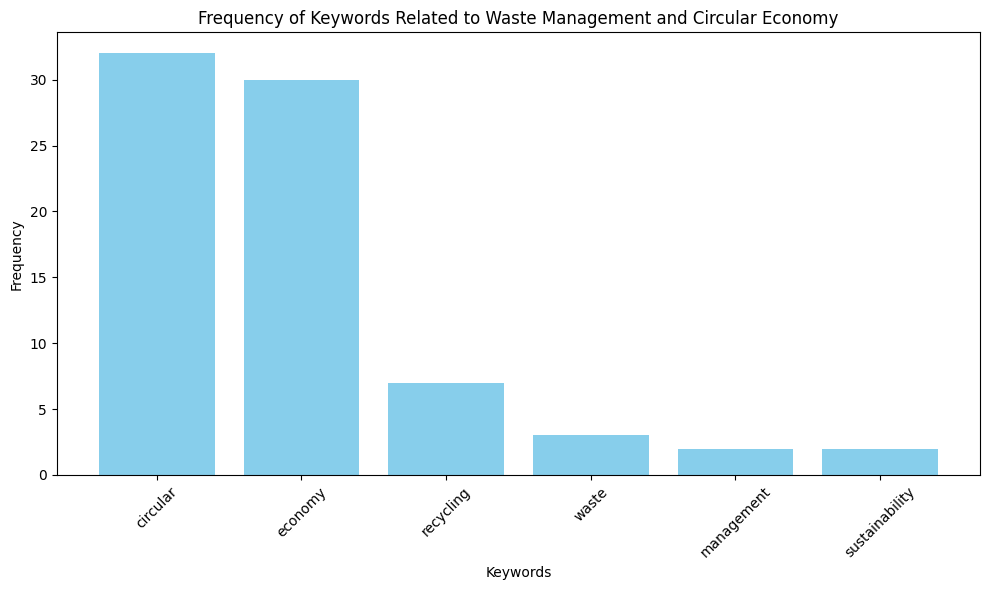

In [10]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt


df = pd.read_csv('pbl_data.csv')

# Concatenate all content texts into a single string
text = ' '.join(df['content'].dropna())

# Tokenize the text into words
words = word_tokenize(text.lower())

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]

# Define specific keywords or topics you want to analyze
keywords = ['waste', 'management', 'circular', 'economy', 'recycling', 'sustainability']  # Add more keywords as needed

# Count the frequency of each keyword in the text
keyword_counts = {keyword: words.count(keyword) for keyword in keywords}

# Sort the keywords by frequency in descending order
sorted_keywords = {k: v for k, v in sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)}

# Plot a bar chart for the top keywords
plt.figure(figsize=(10, 6))
plt.bar(sorted_keywords.keys(), sorted_keywords.values(), color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords Related to Waste Management and Circular Economy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gur Levy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to C:\Users\Gur
[nltk_data]     Levy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gur
[nltk_data]     Levy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


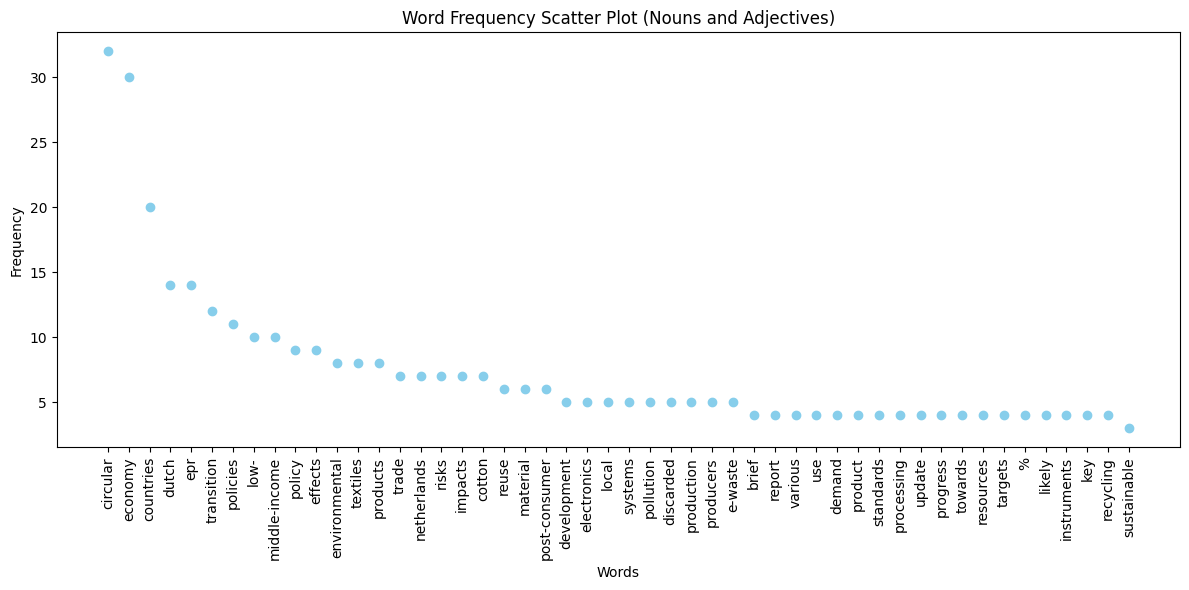

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('pbl_data.csv')

# Combine all the text from the 'content' column
all_text = ' '.join(df['content'].dropna())

# Tokenize the text into words
words = word_tokenize(all_text.lower())

# Define and extend stopwords list based on NLTK's default stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = {'also', 'could', 'may', 'many', 'several'}  # Extend with your own words
stop_words = stop_words.union(additional_stopwords)

# Get Part-of-Speech tags for each word
tagged_words = pos_tag(words)

# Extract nouns and adjectives excluding stopwords
relevant_words = [word for word, pos in tagged_words if pos in ('NN', 'NNS', 'JJ') and word not in stop_words]

# Get the word frequencies
word_freq = Counter(relevant_words)

# Create lists for words and their frequencies
word_list = []
freq_list = []
for word, freq in word_freq.most_common(50):  # Change 50 to the desired number of words to plot
    word_list.append(word)
    freq_list.append(freq)

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(word_list, freq_list, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Scatter Plot (Nouns and Adjectives)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: 'Words'